## Demontration of Hopfield Networks for information retrieval of distorted images
partly adapted from http://codeaffectionate.blogspot.co.at/2013/05/fun-with-hopfield-and-numpy.html which shows a different version

In [1]:
import numpy as np
A = """
.XXX.
X...X
XXXXX
X...X
X...X
"""
 
Z = """
XXXXX
...X.
..X..
.X...
XXXXX
"""


X = """
X...X
.X.X.
..X..
.X.X.
X...X
"""

Load .xls file into a Pandas data frame

In [2]:
def to_pattern(letter):
    return np.array([+1 if c=='X' else -1 for c in letter.replace('\n','')])

In [3]:
import pylab as plt
import numpy as np
def display(patterns):
    from pylab import imshow, cm, show
    plt.subplot(1, 3, 1)
    p0=imshow(patterns[0].reshape((5,5)),cmap=cm.binary, interpolation='nearest')
    plt.subplot(1, 3, 2)
    p1=imshow(patterns[1].reshape((5,5)),cmap=cm.binary, interpolation='nearest')
    plt.subplot(1, 3, 3)
    p2=imshow(patterns[2].reshape((5,5)),cmap=cm.binary, interpolation='nearest')
    plt.show()
    

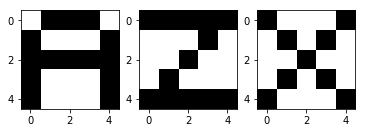

In [4]:
patterns = np.array([to_pattern(A), to_pattern(Z), to_pattern(X)])
display(patterns)
#print patterns

In [5]:
def train(patterns):
    from numpy import zeros, outer, diag_indices 
    r,c = patterns.shape
    W = zeros((c,c))
    for p in patterns:
        W = W + outer(p,p)
    W[diag_indices(c)] = 0
    return W/r

Training = set weights

In [6]:
w=train(patterns)
#print w

In [7]:
def recall(W, patterns, steps=80):
    from numpy import vectorize, dot
    sgn = vectorize(lambda x: -1 if x<0 else +1)
    for step in xrange(steps):        
       # patterns = sgn(dot(patterns,W))
        print "Step: ",step 
        for p in patterns:
            rnd=np.random.randint(25)
            print "rnd:",rnd
            s=dot(p,w[rnd])
            print s
            if s>0:
                p[rnd]=1
            else:
                p[rnd]=-1
                    
          
        display(patterns)
    return patterns

In [8]:
pr=0.9

distA=np.random.choice(2, 25, p=[pr,1-pr])
print distA
distZ=np.random.choice(2, 25, p=[pr,1-pr])
print distZ
distX=np.random.choice(2, 25, p=[pr,1-pr])
print distX

dists= np.array([distA,distZ,distX])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


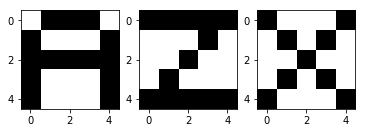

In [9]:
display(patterns)
#print dist_patterns[0]

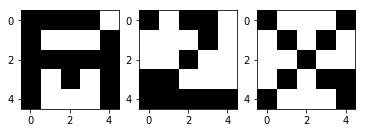

In [10]:
dist_patterns = patterns + 2*dists*(-np.abs(patterns)/patterns)

display(dist_patterns)

Step:  0
rnd: 24
1.33333333333
rnd: 18
-2.0
rnd: 8
11.3333333333


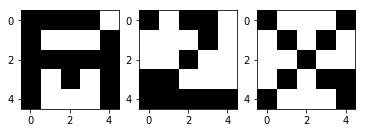

Step:  1
rnd: 2
7.33333333333
rnd: 20
6.66666666667
rnd: 9
-11.3333333333


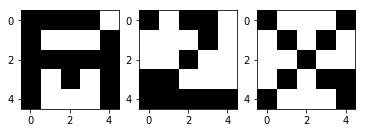

Step:  2
rnd: 23
-4.66666666667
rnd: 6
-2.0
rnd: 13
-11.3333333333


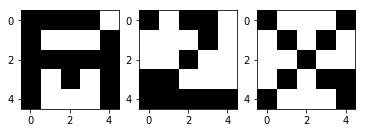

Step:  3
rnd: 1
7.33333333333
rnd: 18
-2.0
rnd: 9
-11.3333333333


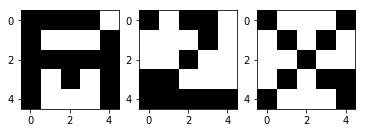

Step:  4
rnd: 20
1.33333333333
rnd: 23
4.0
rnd: 0
11.3333333333


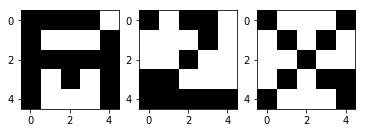

Step:  5
rnd: 9
10.6666666667
rnd: 0
8.66666666667
rnd: 22
-2.0


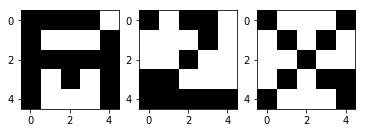

Step:  6
rnd: 10
10.6666666667
rnd: 20
6.66666666667
rnd: 2
-6.66666666667


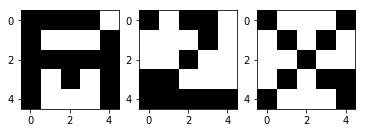

Step:  7
rnd: 16
-10.6666666667
rnd: 13
-8.66666666667
rnd: 0
11.3333333333


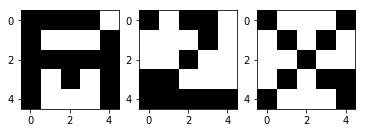

Step:  8
rnd: 7
-1.33333333333
rnd: 1
4.0
rnd: 17
-6.66666666667


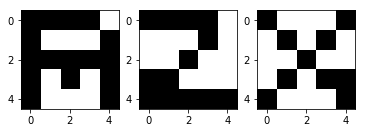

Step:  9
rnd: 0
-12.6666666667
rnd: 12
7.33333333333
rnd: 14
-11.3333333333


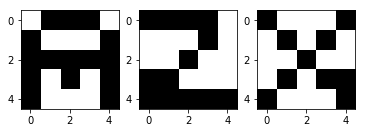

Step:  10
rnd: 5
12.6666666667
rnd: 2
4.0
rnd: 8
11.3333333333


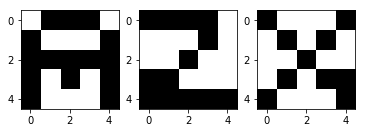

Step:  11
rnd: 15
12.6666666667
rnd: 24
7.33333333333
rnd: 17
-6.66666666667


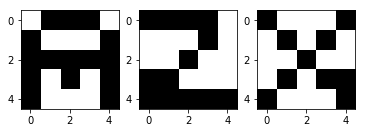

Step:  12
rnd: 3
8.0
rnd: 6
-4.0
rnd: 18
6.66666666667


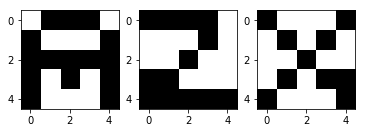

Step:  13
rnd: 23
-5.33333333333
rnd: 5
-8.0
rnd: 15
-11.3333333333


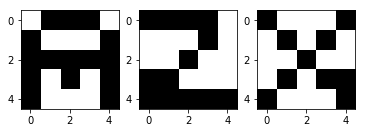

Step:  14
rnd: 0
-12.6666666667
rnd: 4
10.0
rnd: 18
6.66666666667


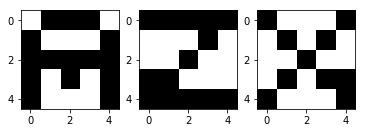

Step:  15
rnd: 0
-12.6666666667
rnd: 2
3.33333333333
rnd: 7
-6.66666666667


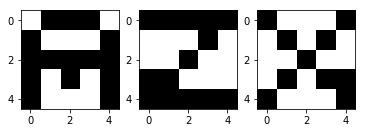

Step:  16
rnd: 18
-8.0
rnd: 5
-10.0
rnd: 3
-6.66666666667


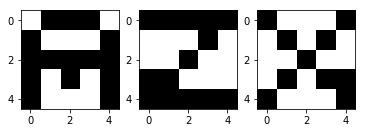

Step:  17
rnd: 10
12.6666666667
rnd: 0
10.0
rnd: 9
-11.3333333333


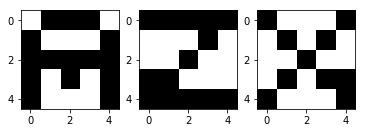

Step:  18
rnd: 16
-12.6666666667
rnd: 18
-3.33333333333
rnd: 10
-11.3333333333


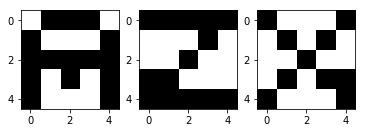

Step:  19
rnd: 24
0.666666666667
rnd: 12
8.0
rnd: 8
11.3333333333


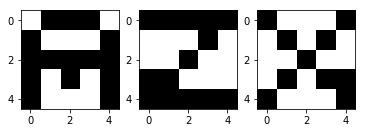

Step:  20
rnd: 22
-5.33333333333
rnd: 23
5.33333333333
rnd: 4
11.3333333333


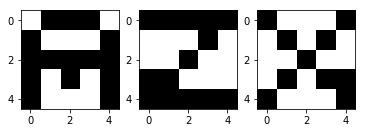

Step:  21
rnd: 19
12.6666666667
rnd: 18
-3.33333333333
rnd: 14
-11.3333333333


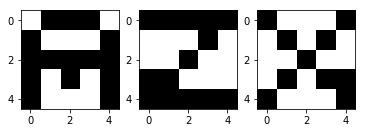

Step:  22
rnd: 14
12.6666666667
rnd: 13
-10.0
rnd: 15
-11.3333333333


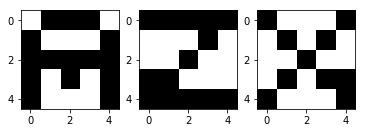

Step:  23
rnd: 5
12.6666666667
rnd: 4
10.0
rnd: 19
-13.3333333333


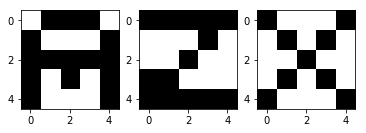

Step:  24
rnd: 6
-8.0
rnd: 0
10.0
rnd: 12
7.33333333333


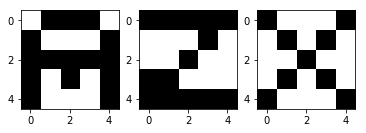

Step:  25
rnd: 17
-2.66666666667
rnd: 2
3.33333333333
rnd: 7
-7.33333333333


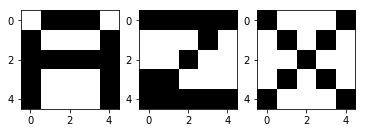

Step:  26
rnd: 6
-8.66666666667
rnd: 14
-10.0
rnd: 15
-13.3333333333


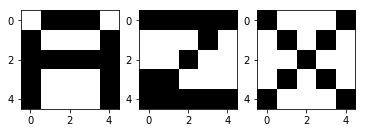

Step:  27
rnd: 1
8.66666666667
rnd: 22
5.33333333333
rnd: 0
13.3333333333


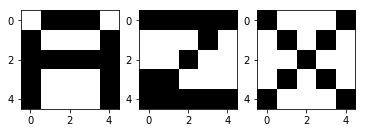

Step:  28
rnd: 16
-12.0
rnd: 22
5.33333333333
rnd: 23
-1.33333333333


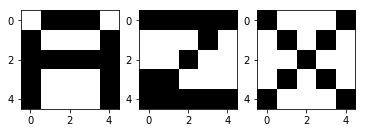

Step:  29
rnd: 18
-8.66666666667
rnd: 22
5.33333333333
rnd: 8
13.3333333333


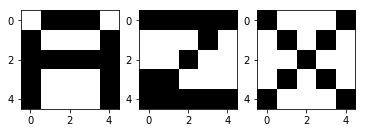

Step:  30
rnd: 19
12.0
rnd: 22
5.33333333333
rnd: 14
-13.3333333333


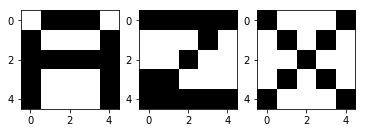

Step:  31
rnd: 20
2.66666666667
rnd: 4
10.0
rnd: 23
-1.33333333333


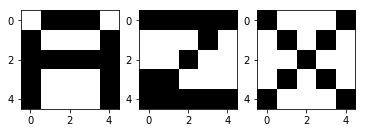

Step:  32
rnd: 13
12.0
rnd: 19
-10.0
rnd: 3
-7.33333333333


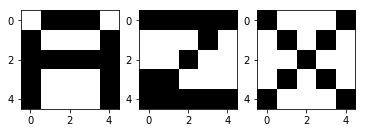

Step:  33
rnd: 12
2.66666666667
rnd: 8
10.0
rnd: 5
-13.3333333333


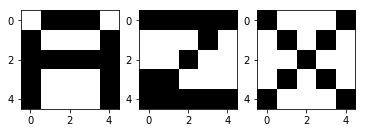

Step:  34
rnd: 24
2.66666666667
rnd: 6
-3.33333333333
rnd: 24
7.33333333333


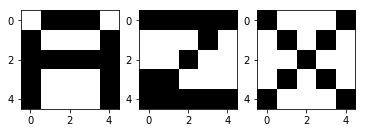

Step:  35
rnd: 22
-6.0
rnd: 10
-10.0
rnd: 23
-1.33333333333


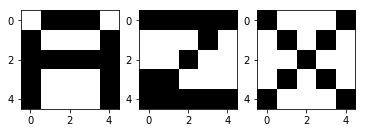

Step:  36
rnd: 12
2.66666666667
rnd: 22
5.33333333333
rnd: 12
7.33333333333


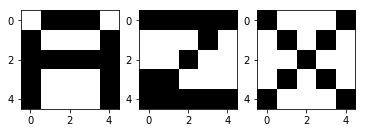

Step:  37
rnd: 1
8.66666666667
rnd: 24
8.0
rnd: 11
-13.3333333333


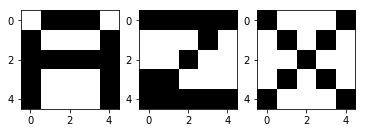

Step:  38
rnd: 5
12.0
rnd: 6
-3.33333333333
rnd: 13
-13.3333333333


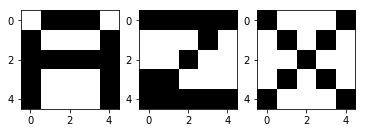

Step:  39
rnd: 4
-12.0
rnd: 3
3.33333333333
rnd: 4
13.3333333333


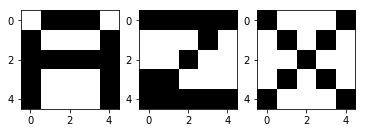

Step:  40
rnd: 24
2.66666666667
rnd: 2
3.33333333333
rnd: 17
-7.33333333333


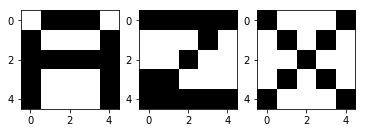

Step:  41
rnd: 9
12.0
rnd: 17
-8.0
rnd: 4
13.3333333333


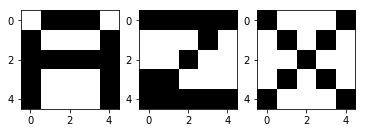

Step:  42
rnd: 0
-12.0
rnd: 2
3.33333333333
rnd: 3
-7.33333333333


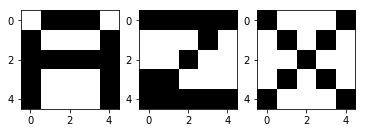

Step:  43
rnd: 8
-12.0
rnd: 12
8.0
rnd: 4
13.3333333333


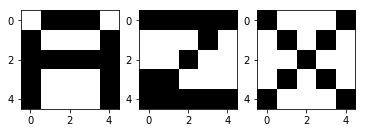

Step:  44
rnd: 11
12.0
rnd: 2
3.33333333333
rnd: 9
-13.3333333333


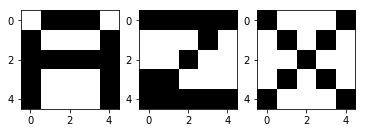

Step:  45
rnd: 6
-8.66666666667
rnd: 18
-3.33333333333
rnd: 21
-1.33333333333


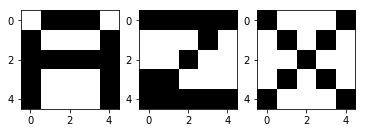

Step:  46
rnd: 22
-6.0
rnd: 21
5.33333333333
rnd: 14
-13.3333333333


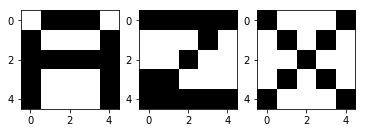

Step:  47
rnd: 21
-6.0
rnd: 1
3.33333333333
rnd: 9
-13.3333333333


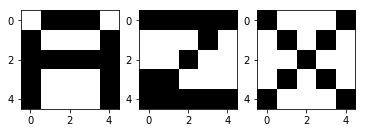

Step:  48
rnd: 21
-6.0
rnd: 13
-10.0
rnd: 19
-13.3333333333


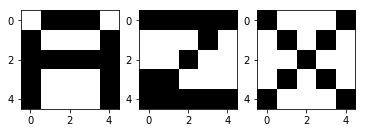

Step:  49
rnd: 11
12.0
rnd: 2
3.33333333333
rnd: 23
-1.33333333333


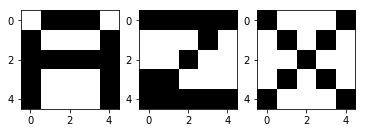

Step:  50
rnd: 14
12.0
rnd: 11
-10.0
rnd: 12
7.33333333333


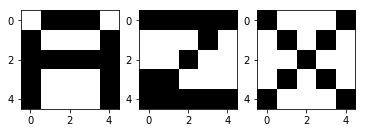

Step:  51
rnd: 0
-12.0
rnd: 6
-3.33333333333
rnd: 9
-13.3333333333


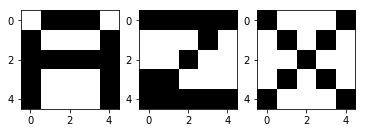

Step:  52
rnd: 24
2.66666666667
rnd: 1
3.33333333333
rnd: 3
-7.33333333333


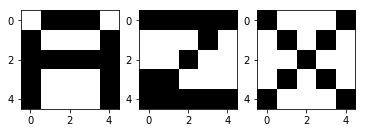

Step:  53
rnd: 10
12.0
rnd: 10
-10.0
rnd: 8
13.3333333333


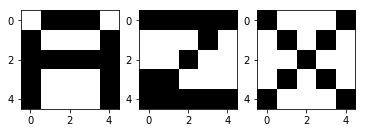

Step:  54
rnd: 3
8.66666666667
rnd: 14
-10.0
rnd: 22
-1.33333333333


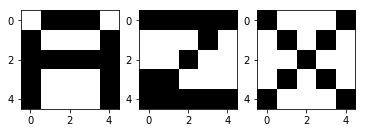

Step:  55
rnd: 17
-2.66666666667
rnd: 7
-8.0
rnd: 4
13.3333333333


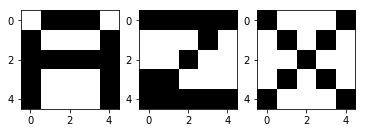

Step:  56
rnd: 1
8.66666666667
rnd: 15
-12.0
rnd: 16
13.3333333333


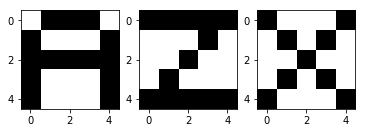

Step:  57
rnd: 5
12.0
rnd: 10
-12.0
rnd: 16
13.3333333333


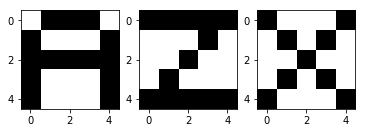

Step:  58
rnd: 21
-6.0
rnd: 5
-12.0
rnd: 2
-7.33333333333


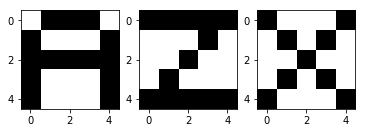

Step:  59
rnd: 24
2.66666666667
rnd: 20
8.66666666667
rnd: 3
-7.33333333333


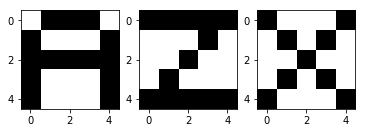

Step:  60
rnd: 3
8.66666666667
rnd: 19
-12.0
rnd: 14
-13.3333333333


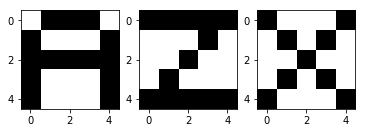

Step:  61
rnd: 18
-8.66666666667
rnd: 20
8.66666666667
rnd: 7
-7.33333333333


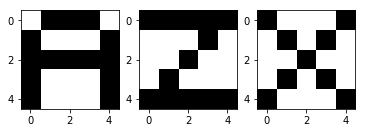

Step:  62
rnd: 8
-12.0
rnd: 10
-12.0
rnd: 1
-7.33333333333


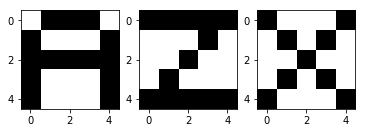

Step:  63
rnd: 17
-2.66666666667
rnd: 10
-12.0
rnd: 4
13.3333333333


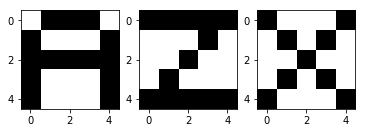

Step:  64
rnd: 21
-6.0
rnd: 17
-8.66666666667
rnd: 23
-1.33333333333


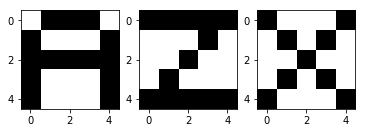

Step:  65
rnd: 4
-12.0
rnd: 0
12.0
rnd: 16
13.3333333333


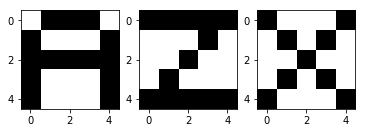

Step:  66
rnd: 2
8.66666666667
rnd: 9
-12.0
rnd: 19
-13.3333333333


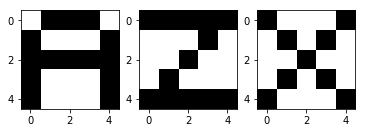

Step:  67
rnd: 2
8.66666666667
rnd: 24
8.66666666667
rnd: 13
-13.3333333333


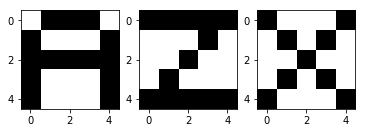

Step:  68
rnd: 16
-12.0
rnd: 14
-12.0
rnd: 3
-7.33333333333


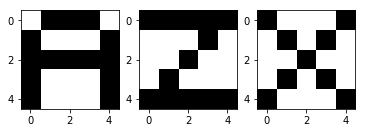

Step:  69
rnd: 2
8.66666666667
rnd: 23
6.0
rnd: 6
7.33333333333


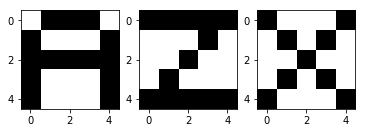

Step:  70
rnd: 1
8.66666666667
rnd: 1
2.66666666667
rnd: 23
-1.33333333333


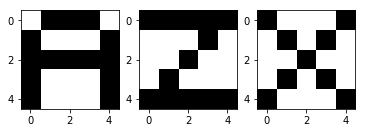

Step:  71
rnd: 19
12.0
rnd: 12
8.66666666667
rnd: 23
-1.33333333333


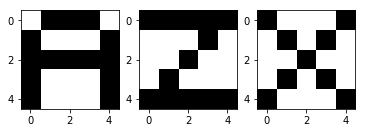

Step:  72
rnd: 24
2.66666666667
rnd: 17
-8.66666666667
rnd: 16
13.3333333333


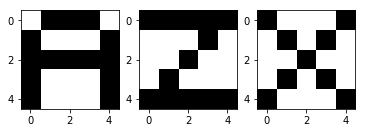

Step:  73
rnd: 7
-2.66666666667
rnd: 13
-12.0
rnd: 3
-7.33333333333


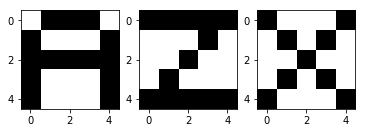

Step:  74
rnd: 8
-12.0
rnd: 1
2.66666666667
rnd: 18
7.33333333333


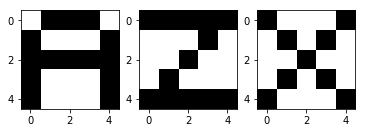

Step:  75
rnd: 19
12.0
rnd: 14
-12.0
rnd: 6
7.33333333333


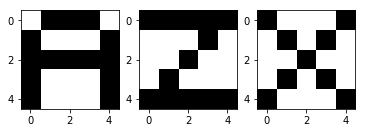

Step:  76
rnd: 2
8.66666666667
rnd: 22
6.0
rnd: 9
-13.3333333333


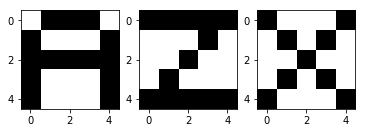

Step:  77
rnd: 7
-2.66666666667
rnd: 3
2.66666666667
rnd: 23
-1.33333333333


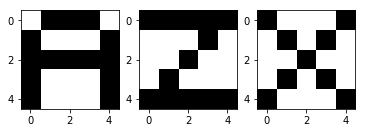

Step:  78
rnd: 4
-12.0
rnd: 12
8.66666666667
rnd: 1
-7.33333333333


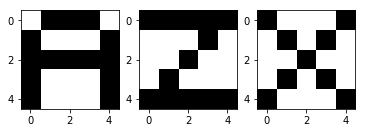

Step:  79
rnd: 18
-8.66666666667
rnd: 14
-12.0
rnd: 4
13.3333333333


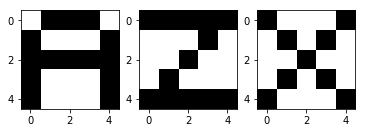

In [11]:
rec_patterns=recall(w,dist_patterns)
#for p in rec_patterns:
 #   display(p)